<a href="https://colab.research.google.com/github/magedyasse/ML-Topic/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
import seaborn  as sns
warnings.filterwarnings('ignore')


In [14]:
data = pd.read_csv(
    'https://github.com/datagy/data/raw/main/titanic.csv',
    usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'])
data = data.dropna()



In [15]:
print(data.head())

   Survived  Pclass     Sex   Age  SibSp     Fare Embarked
0         0       3    male  22.0      1   7.2500        S
1         1       1  female  38.0      1  71.2833        C
2         1       3  female  26.0      0   7.9250        S
3         1       1  female  35.0      1  53.1000        S
4         0       3    male  35.0      0   8.0500        S


In [16]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
target = 'Survived'

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [18]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,712.0,NaN,NaN,NaN,0.404494,0.491139,0.0,0.0,0.0,1.0,1.0
Pclass,712.0,NaN,NaN,NaN,2.240169,0.836854,1.0,1.0,2.0,3.0,3.0
Sex,712,2,male,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,712.0,NaN,NaN,NaN,29.642093,14.492933,0.42,20.0,28.0,38.0,80.0
SibSp,712.0,NaN,NaN,NaN,0.514045,0.930692,0.0,0.0,0.0,1.0,5.0
Fare,712.0,NaN,NaN,NaN,34.567251,52.938648,0.0,8.05,15.64585,33.0,512.3292
Embarked,712,3,S,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [20]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Fare,0
Embarked,0


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.0,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.0,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.0,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.0,5.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.0,512.3292


In [45]:
# sns.pairplot(data=data, hue='Survived')
# plt.show()

In [23]:
X = data.copy()
y = X.pop('Survived')

In [24]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
X['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
X['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

##   Note :  Var is high in Age  - Fare

In [26]:
X.var().sort_values(ascending=False)

,0
Fare,2802.500471
Age,210.045104
SibSp,0.866188
Pclass,0.700325
Embarked,0.272025
Sex,0.231765


In [27]:
y.var()

0.24121746550988452

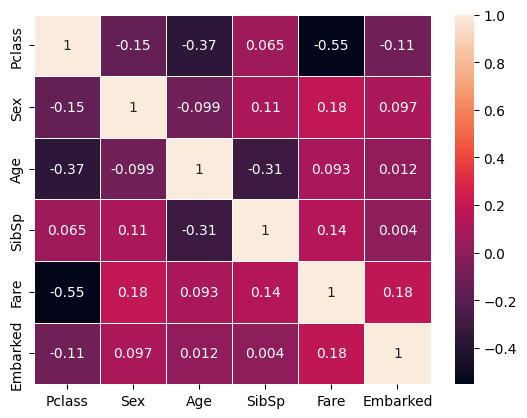

In [28]:
sns.heatmap(X.corr(), annot=True ,linewidth=.5)
plt.show()

In [29]:
X.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,22.0,1,7.2500,0
1,1,1,38.0,1,71.2833,1
2,3,1,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,3,0,35.0,0,8.0500,0


In [30]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [31]:
X

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,22.0,1,7.2500,0
1,1,1,38.0,1,71.2833,1
2,3,1,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,3,0,35.0,0,8.0500,0
...,...,...,...,...,...,...
885,3,1,39.0,0,29.1250,2
886,2,0,27.0,0,13.0000,0
887,1,1,19.0,0,30.0000,0
889,1,0,26.0,0,30.0000,1


In [32]:
X.var().sort_values(ascending=False)

,0
Fare,2802.500471
Age,210.045104
SibSp,0.866188
Pclass,0.700325
Embarked,0.272025
Sex,0.231765


In [33]:
# scaler = StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [40]:
# X_scaled

In [35]:
# X_scaled.var().sort_values(ascending=False)

,0
SibSp,1.001406
Sex,1.001406
Fare,1.001406
Age,1.001406
Pclass,1.001406
Embarked,1.001406


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
scaler   = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [42]:
Ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)



In [43]:
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8321678321678322
